# 0. Web Crawler

In [2]:
import requests
from bs4 import BeautifulSoup

In [2]:
base_url = 'https://weibo.com/liuxiaolingtong'

In [3]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.26 Safari/537.36 Core/1.63.6788.400 QQBrowser/10.3.2727.400'}

In [4]:
response = requests.get(base_url, headers=headers)

In [5]:
response.status_code

200

In [11]:
response.encoding = 'gbk'

In [12]:
response.text

'<!DOCTYPE html>\n<html>\n<head>\n    <meta http-equiv="Content-type" content="text/html; charset=gb2312"/>\n    <title>Sina Visitor System</title>\n</head>\n<body>\n<span id="message"></span>\n<script type="text/javascript" src="/js/visitor/mini_original.js?v=20161116"></script>\n<script type="text/javascript">\n    window.use_fp = "1" == "1"; // 是否采集设备指纹。\n    var url = url || {};\n    (function () {\n        this.l = function (u, c) {\n            try {\n                var s = document.createElement("script");\n                s.type = "text/javascript";\n                s[document.all ? "onreadystatechange" : "onload"] = function () {\n\n                    if (document.all && this.readyState != "loaded" && this.readyState != "complete") {\n                        return\n                    }\n                    this[document.all ? "onreadystatechange" : "onload"] = null;\n                    this.parentNode.removeChild(this);\n                    if (c) {\n                     

## Selenium

In [13]:
from selenium import webdriver

In [14]:
chrome_options = webdriver.ChromeOptions()
chrome_options.headless = False

In [15]:
driver = webdriver.Chrome(executable_path='G:\Code Python\Data Science\chromedriver.exe', 
                          options=chrome_options)

In [20]:
driver.get(base_url + '?is_all=1')

In [21]:
driver.current_url

'https://weibo.com/liuxiaolingtong?is_all=1'

In [22]:
html_doc = driver.page_source

In [23]:
soup = BeautifulSoup(html_doc, 'html5lib')

In [24]:
feeds = soup.find_all(class_='WB_feed_detail')

In [25]:
len(feeds)

15

In [27]:
feeds[0]

<div class="WB_feed_detail clearfix" node-type="feed_content" style="background-image:url(//img.t.sinajs.cn/t6/skin/public/feed_cover/star_057_pc_x2.png?version=a105422888305dba)">
        
            <div class="WB_starcover">
                            <a action-data="id=star_057&amp;isvip=0" action-type="fl_cardCover" href="javascript:void(0)" suda-uatrack="key=vip_background&amp;value=feed_background_click"></a>
                        </div>
                        <div class="WB_screen W_fr" node-type="fl_screen_box">
    <div class="screen_box"><a action-type="fl_menu" href="javascript:void(0);"><i class="W_ficon ficon_arrow_down S_ficon">c</i></a>
        <div class="layer_menu_list" node-type="fl_menu_right" style="display: none; position: absolute; z-index: 999;">
            <ul>
                                                                                <li><a action-data="width=660&amp;height=556&amp;mid=4307621101621245&amp;src=%2F%2Fpromote.vip.weibo.com%2Fpromotea

## Mobile

In [28]:
mobile_url = 'https://m.weibo.cn/u/1211441627'

In [29]:
driver.get(mobile_url)

In [30]:
html_doc = driver.page_source

In [31]:
soup = BeautifulSoup(html_doc, 'lxml')

In [32]:
len(soup.find_all(class_='card', attrs='m-panel'))

14

In [33]:
js_load_page = '''
xmlhttp = new XMLHttpRequest();
xmlhttp.open("GET","https://m.weibo.cn/api/container/getIndex?type=uid&value=1211441627&containerid=1076031211441627&page=3",true);
xmlhttp.setRequestHeader("Accept", "application/json, text/plain, */*");
xmlhttp.setRequestHeader("MWeibo-Pwa", "1");
xmlhttp.setRequestHeader("X-Requested-With", "XMLHttpRequest");
xmlhttp.send(null);
'''

In [35]:
driver.execute_script(script=js_load_page)

## Mobile + XHR + JSON

In [5]:
xhr_url = 'https://m.weibo.cn/api/container/getIndex'

params = {'type':'uid',
          'value':'1211441627',
          'containerid':'1076031211441627',
          'page':1}

In [6]:
response = requests.get(xhr_url, params=params)

In [7]:
feed_dict = response.json()

In [8]:
feed_dict

{'ok': 1,
 'data': {'cardlistInfo': {'containerid': '1076031211441627',
   'v_p': 42,
   'show_style': 1,
   'total': 5981,
   'page': 2},
  'cards': [{'card_type': 9,
    'itemid': '1076031211441627_-_4309109417936394',
    'scheme': 'https://m.weibo.cn/status/H3OYBxiCm?mblogid=H3OYBxiCm&luicode=10000011&lfid=1076031211441627',
    'mblog': {'created_at': '6小时前',
     'id': '4309109417936394',
     'idstr': '4309109417936394',
     'mid': '4309109417936394',
     'can_edit': False,
     'show_additional_indication': 0,
     'text': '<a href=\'/n/环球网\'>@环球网</a> <span class="url-icon"><img alt="[耶]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_ye-4ef8705b08.png" style="width:1em; height:1em;"/></span>我们有幸赶上了好时代、新时代，衷心地感谢观众朋友们多年的支持与关注<span class="url-icon"><img alt="[good]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_good-55854d01bb.png" style="width:1em; height:1em;"/></span><span class="url-icon"><img alt="[作揖]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_zuoyi-38716bd05f.png" sty

In [10]:
sample_feed = feed_dict['data']['cards'][2]

In [11]:
sample_feed['mblog']['text']

'自取其辱'

In [16]:
from tqdm import tqdm_notebook
import time

In [45]:
posts = []

In [48]:
for page in tqdm_notebook(range(1, 1000)):
    params['page'] = page
    response = requests.get(xhr_url, params=params)
    feed_dict = response.json()
    print("\n>>>> PAGE: {} <<<<".format(page))
    if feed_dict['ok'] == 1:
        # 当页微博数
        nb_blogs = len(feed_dict['data']['cards'])
        for i in range(nb_blogs):
            # 普通微博
            if feed_dict['data']['cards'][i]['card_type'] == 9:
                mblog = feed_dict['data']['cards'][i]['mblog']
                mblog_id = mblog['id']
                date = mblog['created_at']
                text = mblog['text']
                device = mblog['source']
                reposts_count = mblog['reposts_count']
                comments_count = mblog['comments_count']
                attitudes_count = mblog['attitudes_count']
                print(">>>> {} {}<<<<".format(date, text[:30]))
                posts.append([mblog_id, date, text, reposts_count, comments_count, attitudes_count])
        time.sleep(1)
    else:
        break


>>>> PAGE: 1 <<<<
>>>> 6小时前 <a href='/n/环球网'>@环球网</a> <spa<<<<
>>>> 23小时前 自取其辱<<<<
>>>> 11-20 学照相：北京十里河文化街民俗铜组像<span class="<<<<
>>>> 11-20 今天是 <a  href="https://m.weibo.<<<<
>>>> 11-19 今天（农历十月十二）在福建、广东等不少省市及地区认为是齐天大<<<<
>>>> 11-18 🇨🇳中国，一点都不能少！<<<<
>>>> 11-18 获提名已不敢当 🙏<span class="url-icon<<<<
>>>> 11-17 <a href='/n/人民网'>@人民网</a> ：《大圣<<<<
>>>> 11-17 1961年的今天，毛泽东主席在10月10日看了由浙江绍剧团(<<<<
>>>> 11-15 <span class="url-icon"><img al<<<<


# 1. Data Clearning

In [3]:
import numpy as np
import pandas as pd

In [146]:
mblog_df_new = pd.DataFrame(posts)

In [182]:
mblog_df_new

,id,date,text,reposts,comments,like
0,4309109417936394,6小时前,"<a href='/n/环球网'>@环球网</a> <span class=""url-ico...",130,0,1936
1,4308866047023540,23小时前,自取其辱,165,0,3522
2,4308437510888238,11-20,"学照相：北京十里河文化街民俗铜组像<span class=""url-icon""><img a...",116,0,2723
3,4308345349150815,11-20,"今天是 <a href=""https://m.weibo.cn/search?contai...",199,0,4306
4,4307983288013944,11-19,今天（农历十月十二）在福建、广东等不少省市及地区认为是齐天大圣的诞生日，每年都会在这天举行隆...,172,0,3335
5,4307688097481835,11-18,🇨🇳中国，一点都不能少！,233,0,9292
6,4307621101621245,11-18,"获提名已不敢当 🙏<span class=""url-icon""><img alt=""[握手]...",446,0,12722
7,4307296432985214,11-17,<a href='/n/人民网'>@人民网</a> ：《大圣轮回之大闹天宫》全新宣传片即将登...,317,0,2273
8,4307261847968774,11-17,1961年的今天，毛泽东主席在10月10日看了由浙江绍剧团(父亲六龄童、伯父七龄童、二哥小六...,136,0,3301
9,4306722635820150,11-15,"<span class=""url-icon""><img alt=""[作揖]"" src=""//...",129,1,2386


In [159]:
#mblog_df = pd.DataFrame(posts)
mblog_df_new.columns = ['id', 'date', 'text', 'reposts', 'comments', 'like']

In [168]:
mblog_df = pd.concat([mblog_df_new, mblog_df], sort=False)

In [207]:
mblog_df

,id,date,text,reposts,comments,like,at
0,4309109417936394,2018-11-22,"<a href='/n/环球网'>@环球网</a> <span class=""url-ico...",130,0,1936.0,[环球网]
1,4308866047023540,2018-11-22,自取其辱,165,0,3522.0,[]
2,4308437510888238,2018-11-20,"学照相：北京十里河文化街民俗铜组像<span class=""url-icon""><img a...",116,0,2723.0,[]
3,4308345349150815,2018-11-20,"今天是 <a href=""https://m.weibo.cn/search?contai...",199,0,4306.0,[]
4,4307983288013944,2018-11-19,今天（农历十月十二）在福建、广东等不少省市及地区认为是齐天大圣的诞生日，每年都会在这天举行隆...,172,0,3335.0,[]
5,4307688097481835,2018-11-18,🇨🇳中国，一点都不能少！,233,0,9292.0,[]
6,4307621101621245,2018-11-18,"获提名已不敢当 🙏<span class=""url-icon""><img alt=""[握手]...",446,0,12722.0,[]
7,4307296432985214,2018-11-17,<a href='/n/人民网'>@人民网</a> ：《大圣轮回之大闹天宫》全新宣传片即将登...,317,0,2273.0,"[人民网, 四九游戏]"
8,4307261847968774,2018-11-17,1961年的今天，毛泽东主席在10月10日看了由浙江绍剧团(父亲六龄童、伯父七龄童、二哥小六...,136,0,3301.0,[]
9,4306722635820150,2018-11-15,"<span class=""url-icon""><img alt=""[作揖]"" src=""//...",129,1,2386.0,[品牌联盟]


In [173]:
def complete_date(date):
    if len(date) < 6:
        return '2018-' + date
    else:
        return date

In [174]:
mblog_df['date'][:2] = '11-22'

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
mblog_df['date'][:10] = mblog_df['date'][:10].apply(complete_date)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [179]:
mblog_df['date'] = pd.to_datetime(mblog_df['date'])

In [166]:
mblog_df = pd.read_csv('six_little_child_weibo_181115.csv', index_col=None, encoding='ANSI')

In [181]:
mblog_df.to_csv('six_little_child_weibo_181122.csv', index=False, encoding='utf-8')

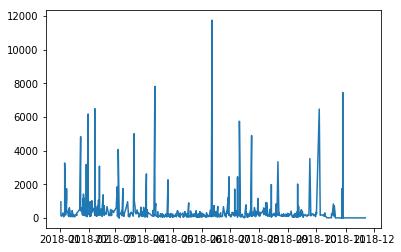

In [199]:
plt.plot(mblog_df_2018['date'], mblog_df_2018['comments'])

In [198]:
mblog_df_2018 = mblog_df[mblog_df['date'] > pd.to_datetime('2018', yearfirst=True)]

In [194]:
pd.to_datetime('2017', yearfirst=True)

Timestamp('2017-01-01 00:00:00')

# 2. @

In [185]:
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
soup = BeautifulSoup(mblog_df.iloc[0]['text'], 'html.parser')

In [201]:
soup

<a href="/n/环球网">@环球网</a> <span class="url-icon"><img alt="[耶]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_ye-4ef8705b08.png" style="width:1em; height:1em;"/></span>我们有幸赶上了好时代、新时代，衷心地感谢观众朋友们多年的支持与关注<span class="url-icon"><img alt="[good]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_good-55854d01bb.png" style="width:1em; height:1em;"/></span><span class="url-icon"><img alt="[作揖]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_zuoyi-38716bd05f.png" style="width:1em; height:1em;"/></span>🙏 

In [209]:
at_dict = {}

In [205]:
def get_at(text):
    at_list = []
    soup = BeautifulSoup(text, 'lxml')
    
    # 如果本条微博内有外链
    if soup.find_all('a'):
        # 遍历外链
        for a in soup.find_all('a'):
            # 是否为@
            if '@' in a.text:
                at_user = a.text[1:]
                at_list.append(at_user)
            
                if at_user in at_dict:
                    at_dict[at_user] += 1
                else:
                    at_dict[at_user] = 1
                
    return at_list

In [210]:
mblog_df['at'] = mblog_df['text'].apply(get_at)

In [215]:
at_series = pd.Series(at_dict, index=at_dict.keys())

In [218]:
at_series.sort_values(ascending=False)

儒意影业             301
贰零壹陆影视传媒         280
行走的禅文化           266
光影先生1981         150
六小龄童图书签名庿/a>      39
董董Dora            31
北京卫视              31
麦丹影视上海有限公司        29
迟重瑿-人生只做一事又何妨     27
cctv4中国文艺         26
长江文艺北京中心          24
大圣车服官微            24
长江文艺出版礿/a>        24
电影财迷官微            23
汪粤_               23
俊超charlie西三水紅     23
沙和尚刘大刚            23
陈龙                23
云南师范大学            23
百事中国              21
行者李一偿/a>          20
潘家园网              20
山东卫视              20
CCTV戏曲频道          19
大圣科技              19
一品行的微卿/a>         18
郑景亿016            18
tcszg张胜           17
六小龄童              16
新浪娱乐              15
                ... 
乐视商城               1
CCTV风云剧场           1
猫眼电影               1
王宝弿/a> 导演皿         1
奥林匹克中国             1
院长的小镜子             1
覃琨瑿23_137          1
新晚抿/a>  ????       1
看看新闻KNEWS          1
孙杨                 1
黑龙江广播电视报           1
无锡市图书馆在线           1
中国女排               1
AisinGioroZD       1
金陵晚报               1
燕赵晚报               1
华声在线         

# 3. EMOJI

In [221]:
emoji_dict = {}

def get_emoji(text):    
    emoji_list = []
    soup = BeautifulSoup(text, 'lxml')
    
    # 如果本条微博有图标
    if soup.find_all(class_='url-icon'):
        
        # 遍历图标
        for span in soup.find_all('span', class_='url-icon'):
            # 如果该图标是表情
            
            if 'alt' in span.img.attrs:
                emoji_id = span.img['alt'][1:-1]
                emoji_src = span.img['src']
                emoji_list.append(emoji_id)

                if emoji_id not in emoji_dict:
                    emoji_dict[emoji_id] = 1
                    
                    img_response = requests.get('http:' + emoji_src)
                    with open('emoji/{}.png'.format(emoji_id), 'wb') as f:
                        f.write(img_response.content)
                else:
                    emoji_dict[emoji_id] += 1
    
    return emoji_list

In [222]:
mblog_df['emoji'] = mblog_df['text'].apply(get_emoji)

In [223]:
emoji_series = pd.Series(emoji_dict)

In [226]:
emoji_series.sort_values(ascending=False)

作揖      1237
握手      1104
耶        801
good     612
嘻嘻       184
泪        106
蜡烛        76
拳头        47
ok        45
微笑        21
鲜花        12
蛋糕        12
赞          8
心          8
礼物         6
酷          6
吃惊         4
怒          4
馋嘴         3
偷笑         3
困          3
摊手         2
疑问         2
悲伤         2
晕          2
可爱         2
太开心        2
干杯         2
鼓掌         2
月亮         1
抱抱         1
抓狂         1
睡          1
哈哈         1
阴险         1
爱你         1
拜拜         1
绿丝带        1
dtype: int64

# 4. Visualization

In [88]:
from pyecharts import Bar, Scatter

In [98]:
bar = Bar("六小龄童最常用的表情(Top 10)")

In [99]:
bar.add('Emoji', emoji_df[:10].index, emoji_df['counts'][:10], 
        xaxis_interval=0, xaxis_rotate=90, xaxis_label_textsize=18)

In [ ]:
scatter = Scatter("六小龄童最常用的表情")

In [ ]:
scatter.add('Emoji', emoji_df.index, emoji_df['counts'],
            xaxis_type='category', is_visualmap=True, visual_type='size', 
            visual_dimension=1,visual_range=[1,1600])

In [89]:
bar_at = Bar("六小龄童最常@的账号(Top 20)")

In [94]:
bar_at.add('@', at_df.index[:20], at_df['counts'][:20], 
            xaxis_interval=0, xaxis_rotate=30, xaxis_name_size=10)

# 5. WordCloud

In [227]:
import jieba
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [231]:
mblog_df.loc[i, 'text']

'孩子们，已经立冬了，你们好吗？想念大家！<span class="url-icon"><img alt="[good]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_good-55854d01bb.png" style="width:1em; height:1em;"/></span><span class="url-icon"><img alt="[握手]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_woshou-9ec25c8391.png" style="width:1em; height:1em;"/></span><span class="url-icon"><img alt="[耶]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_ye-4ef8705b08.png" style="width:1em; height:1em;"/></span> '

In [234]:
BeautifulSoup(mblog_df.loc[i, 'text'], 'html5lib').text

'孩子们，已经立冬了，你们好吗？想念大家！ '

In [235]:
six_weibo_list = [BeautifulSoup(i, 'html5lib').text for i in mblog_df['text']]

In [236]:
six_weibo_list

['@环球网 我们有幸赶上了好时代、新时代，衷心地感谢观众朋友们多年的支持与关注🙏 ',
 '自取其辱',
 '学照相：北京十里河文化街民俗铜组像 ',
 '今天是 #国际儿童日# ，这是为儿童设立的行动日，也是充分体现儿童参与的节日，让我们共同保护儿童权利，从小树立正确的人生观，为每个孩子创造更美好的未来。 ',
 '今天（农历十月十二）在福建、广东等不少省市及地区认为是齐天大圣的诞生日，每年都会在这天举行隆重的齐天大圣生日庆典，闽北、闽西北等很多地方都有齐天大圣庙，家家户户都供奉有孙悟空像，还有各种木雕及不同材质的孙悟空工艺品展示。🙏 ',
 '🇨🇳中国，一点都不能少！',
 '获提名已不敢当 🙏 ',
 '@人民网 ：《大圣轮回之大闹天宫》全新宣传片即将登录湖南卫视@四九游戏  《大圣轮回之大闹天宫》全新宣传片即将登录湖南卫视 ',
 '1961年的今天，毛泽东主席在10月10日看了由浙江绍剧团(父亲六龄童、伯父七龄童、二哥小六龄童等同仁们）演出的绍剧舞台剧《孙悟空三打白骨精》后挥毫写下了诗词《七律·和郭沫若同志》，“金猴奋起千钧棒，玉宇澄清万里埃”的光辉诗句已经成为经典绝唱。🙏 ',
 '🙏 @品牌联盟  中国品牌40年40人候选人：六小龄童 ',
 '',
 '为我的母校：浙江绍兴市第一初级中学的小学妹的书法点赿span class="url-icon"> 为校名题字的居然昿4岁学生！她一提笔，你就输亿/span> ',
 '我们取经回来了！《敢问路在何方》？路在脚下＿span class="url-icon">?? ',
 ' 国家网信办“亮剑”自媒体乱象 依法严管将成常怿/span> ',
 '河北新闻罿span class="url-icon">六小龄童现身保定讲述“猴王精神?/span> ',
 '从孙悟空到玄奘大师：《北广人物?span class="url-icon"> ',
 '中国野生动物保护协会成立三十五周年暨协会形象宣传片首发盛典今天上午在北京隆重举行…?span class="url-icon"> ',
 '中国唐尧罿span class="url-icon">@北京长江新世线/a> @儒意影业  @贰零壹陆影视传媒 @游福  @行走的禅文化 网页链接 ',
 '明天，国民购物狂欢节叿1就要来了。每到这时候，我是既感慨又激动。我担忧大

In [237]:
six_weibo_texts = ''.join(six_weibo_list)

In [238]:
seg_gen = jieba.cut(six_weibo_texts, cut_all=False)

In [240]:
seg_list = [i for i in seg_gen]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Jizhi\AppData\Local\Temp\jieba.cache
Loading model cost 0.677 seconds.
Prefix dict has been built succesfully.


In [241]:
seg_texts = ' '.join(seg_list)

In [243]:
from PIL import Image

In [244]:
monkey_mask=np.array(Image.open("images/wukong.jpg"))

In [254]:
stopwords=set(STOPWORDS) | {'网页', '链接', '微博', '博文', 'span', 'class', 'url', 'icon'}

In [255]:
wordcloud = WordCloud(background_color='white', font_path='C:\Windows\Fonts\simhei.ttf',
                      max_words=200, collocations=False, mask=monkey_mask,
                      stopwords=stopwords)

In [256]:
wordcloud.generate(text=seg_texts)

In [257]:
wordcloud.to_file('six_wordcloud.jpg')

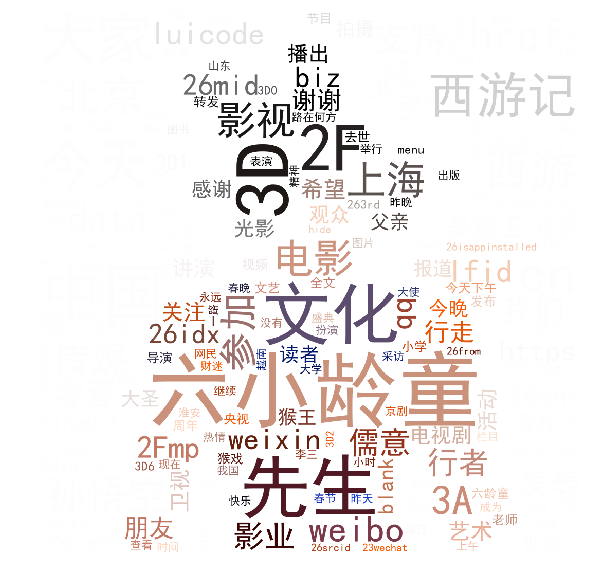

In [258]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1) 

image_colors = ImageColorGenerator(monkey_mask)
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis("off")
plt.show()

In [259]:
from jieba import posseg

In [261]:
for weibo in six_weibo_list[:20]:
    words = posseg.cut(weibo)
    for word, flag in words:
        if flag == 'ns':
            print('{} {}'.format(word, flag))

北京 ns
河 ns
福建 ns
广东 ns
庆典 ns
闽北 ns
闽西北 ns
中国 ns
大圣 ns
大圣 ns
浙江 ns
绍 ns
二哥 ns
埃 ns
中国 ns
浙江 ns
绍兴市 ns
河北 ns
北京 ns
中国 ns
北京 ns
长江 ns
大圣 ns
大圣 ns
大圣 ns
直隶 ns
直隶 ns


In [266]:
places_visited = []

for weibo in tqdm_notebook(six_weibo_list):
    
    words = posseg.cut(weibo)
    places = []
    for word, flag in words:
        if flag == 'ns'and word not in places:
            places.append(word)
    
    places_visited.append(' '.join(places))

In [268]:
mblog_df['places'] = places_visited

In [272]:
'大圣'.split()

['大圣']

In [273]:
places = []

for place in places_visited:
    places.extend(place.split())

In [275]:
place_series = pd.Series(places)

In [283]:
place_series

0         北京
1          河
2         福建
3         广东
4         庆典
5         闽北
6        闽西北
7         中国
8         大圣
9         浙江
10         绍
11        二哥
12         埃
13        中国
14        浙江
15       绍兴市
16        河北
17        北京
18        中国
19        北京
20        长江
21        大圣
22        直隶
23        大圣
24        北京
25        长江
26        厦门
27        四川
28        陕西
29        云南
        ... 
6121      中国
6122       丹
6123      天津
6124      中国
6125      尼泊
6126      美丽
6127    文明古国
6128      尼泊
6129      贵国
6130      库马
6131      中国
6132      京城
6133      西南
6134      上台
6135      二哥
6136      北京
6137      西城
6138      中国
6139      西城
6140      中国
6141      中国
6142      建国
6143     比利时
6144      中国
6145      马洋
6146      庆典
6147      京城
6148      平山
6149     比利时
6150      中国
Length: 6151, dtype: object

In [278]:
from pyecharts import Map

In [280]:
china_provinces = ['北京','天津','上海','重庆','河北','山西','辽宁','吉林','黑龙江','江苏','浙江',
                   '安徽','福建','江西','山东','河南','湖北','湖南','广东','海南','四川','贵州',
                   '云南','陕西','甘肃','青海','台湾','内蒙古','广西','西藏','宁夏','新疆',
                   '香港','澳门']

In [284]:
visit_dict = {}

for i in place_series:
    if i in china_provinces:
        visit_dict[i] = place_series.value_counts()[i]

In [285]:
visit_dict

{'北京': 413,
 '福建': 13,
 '广东': 16,
 '浙江': 76,
 '河北': 29,
 '四川': 29,
 '陕西': 66,
 '云南': 41,
 '广西': 2,
 '上海': 301,
 '湖北': 15,
 '重庆': 46,
 '天津': 26,
 '辽宁': 32,
 '江苏': 56,
 '内蒙古': 46,
 '甘肃': 20,
 '台湾': 39,
 '香港': 48,
 '吉林': 4,
 '安徽': 55,
 '新疆': 10,
 '山西': 24,
 '河南': 33,
 '贵州': 10,
 '青海': 9,
 '海南': 17,
 '宁夏': 5,
 '江西': 17,
 '湖南': 10,
 '山东': 61,
 '黑龙江': 4,
 '澳门': 2,
 '西藏': 1}

In [288]:
value = visit_dict.values()
attr = visit_dict.keys()

In [294]:
six_map = Map('六学地图')

In [295]:
six_map.add('安排', attr, value, maptype='china',
           is_visualmap=True, is_map_symbol_show=False)

奥学
京学